## Importing packages

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Matplotlib Configuration

In [274]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 

## Reading Data

In [244]:
df = pd.read_excel("./ToyotaCorolla.xls", "data", index_col=0)
df.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,0,0,0,1,0,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,0,1,0,0,0,1,0,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,1,0,0,0,1,0,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,1,0,0,0,1,0,0,0,0
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,0,1,0,1,0,0,0,0


## One-hot Encoding


In [163]:
one_hot_columns = ["Fuel_Type", "Color"]
for column in one_hot_columns:
    dummies = pd.get_dummies(df[column])
    df[dummies.columns] = dummies
df.drop(columns=one_hot_columns, inplace=True)

In [164]:
df.drop(columns=["Model"], inplace=True)
df.shape

(1436, 48)

## Normalization

In [165]:
# MinMax Normalization for better performance
df = (df - df.min()) / (df.max() - df.min())

In [166]:
df.isna().sum()

Price                   0
Age_08_04               0
Mfg_Month               0
Mfg_Year                0
KM                      0
HP                      0
Met_Color               0
Automatic               0
CC                      0
Doors                   0
Cylinders            1436
Gears                   0
Quarterly_Tax           0
Weight                  0
Mfr_Guarantee           0
BOVAG_Guarantee         0
Guarantee_Period        0
ABS                     0
Airbag_1                0
Airbag_2                0
Airco                   0
Automatic_airco         0
Boardcomputer           0
CD_Player               0
Central_Lock            0
Powered_Windows         0
Power_Steering          0
Radio                   0
Mistlamps               0
Sport_Model             0
Backseat_Divider        0
Metallic_Rim            0
Radio_cassette          0
Parking_Assistant       0
Tow_Bar                 0
CNG                     0
Diesel                  0
Petrol                  0
Beige       

In [167]:
df.fillna(0, inplace=True)

In [168]:
df.isna().sum()

Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
HP                   0
Met_Color            0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
CNG                  0
Diesel               0
Petrol               0
Beige                0
Black                0
Blue                 0
Green                0
Grey                 0
Red        

## Train Validation Test Split

In [169]:
def train_validation_test_split(df, train_size, validation_size, test_size):
    train = df.sample(frac=train_size, random_state=0)
    df.drop(train.index, inplace=True)
    print("train_size:", train.shape)
    validation_size = (validation_size) / (validation_size + test_size)
    validation = df.sample(frac=validation_size, random_state=0)
    df.drop(validation.index, inplace=True)
    print("validation_size:", validation.shape)
    test = df
    print("test_size:", test.shape)
    return train, validation, test

In [170]:
train_size, validation_size, test_size = 0.7, 0.15, 0.15
train, validation, test = train_validation_test_split(df.copy(), train_size, validation_size, test_size)

train_size: (1005, 48)
validation_size: (216, 48)
test_size: (215, 48)


In [171]:
y_train = train["Price"].to_numpy()
X_train = train.drop("Price", axis=1).to_numpy()

y_validation = validation["Price"].to_numpy()
X_validation = validation.drop("Price", axis=1).to_numpy()

y_test = test["Price"].to_numpy()
X_test = test.drop("Price", axis=1).to_numpy()

## Plot Function

In [267]:
def plotting(validation_loss, test_loss, method):
    plt.plot(validation_loss, label='validation loss')
    plt.plot(test_loss, label='test loss')
    plt.title("{}: Loss of {} iteration with eta {}".format(method, iterations_no, eta))
    plt.legend()
    plt.show()

## Constant Values

In [299]:
# iterations = np.arange(50, 500, 50)
# etas = np.arange(0.0001, 0.001, 0.0001)
# batch_sizes = np.arange(20, 200, 10)
eta, batch_size, iterations_no = 0.0001, 20, 1000



## 1. Stochastic Gradient Descent

$$
w^{i +1} = w^{i} + \eta(t_n - w^{(i)T} \phi_n)\phi_n
$$

In [300]:
def SGD(X_train, y_train, X_validation, y_validation, X_test, y_test, eta, batch_size, iterations):
    w = np.zeros(X_train.shape[1])
    train_loss, validation_loss, test_loss = list(), list(), list()
    
    for _ in range(iterations):
        indices = np.random.choice(X_train.shape[0], batch_size, replace=False)
        selected_X_train = X_train[indices]
        selected_y_train = y_train[indices]
        train_SSE = (np.sum(selected_y_train - selected_X_train.dot(w))**2)/2
        validation_SSE = (np.sum(y_validation - X_validation.dot(w))**2)/2
        test_SSE = (np.sum(y_test - X_test.dot(w))**2)/2 
        train_loss.append(train_SSE)
        validation_loss.append(validation_SSE)
        test_loss.append(test_SSE)
        w += eta * (selected_y_train - selected_X_train.dot(w)).dot(selected_X_train)
    return train_loss, validation_loss, test_loss, w

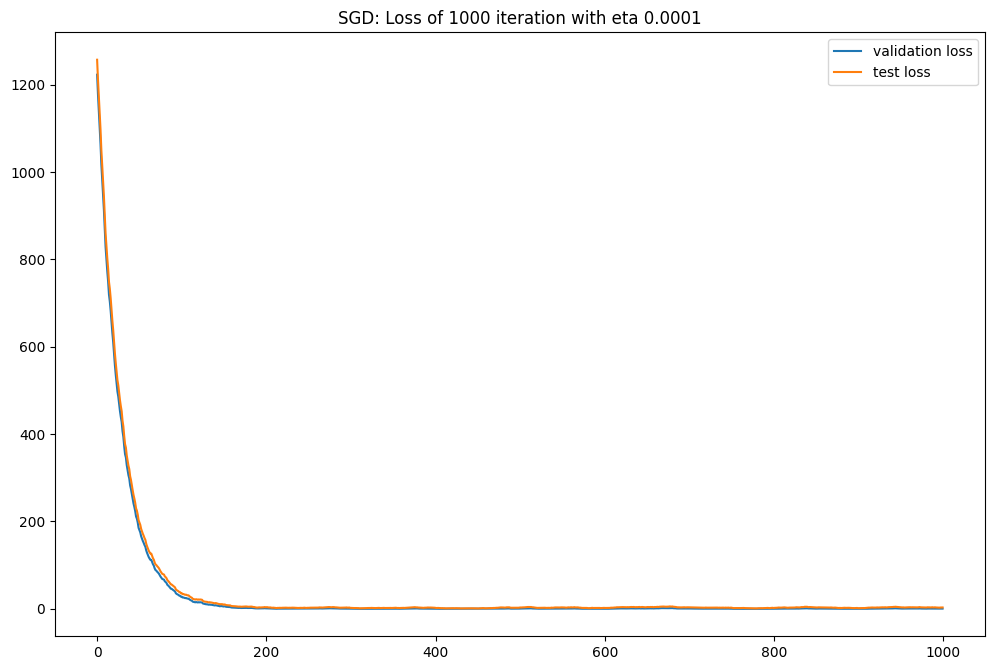

In [301]:
train_loss, validation_loss, test_loss, w = SGD(X_train, y_train, X_validation, y_validation, X_test, y_test, eta, batch_size, iterations_no)
plotting(validation_loss, test_loss, "SGD")

In [314]:
np.subtract(validation_loss, test_loss)

array([-34.21530531, -33.85382062, -33.44938883, -33.19076824,
       -32.98674934, -32.6591216 , -32.18603457, -31.85442341,
       -31.5835752 , -31.32531951, -30.93384892, -30.47684047,
       -30.09491895, -29.72115588, -29.39804984, -29.10986025,
       -28.85798122, -28.48849403, -28.22122242, -27.90948062,
       -27.55375599, -27.22112769, -26.95165404, -26.62653315,
       -26.20490644, -25.98197074, -25.61767223, -25.18879623,
       -24.87356958, -24.66766236, -24.18875253, -23.94710048,
       -23.47460473, -23.0296838 , -22.7783724 , -22.3161843 ,
       -22.02143641, -21.71628471, -21.52017868, -21.04964722,
       -20.83930857, -20.37609471, -20.05139919, -19.69594233,
       -19.42220525, -19.0765771 , -18.64373899, -18.47441932,
       -18.17376058, -17.71108516, -17.50324965, -17.27514005,
       -16.91660677, -16.69659341, -16.47748919, -16.28479898,
       -16.03599563, -15.85700818, -15.38602005, -15.07452246,
       -14.86509983, -14.6444487 , -14.48189764, -14.34

## 2. Ridge Regression

In [320]:
def SGD_Regularized(lambda_, X_train, y_train, X_validation, y_validation, X_test, y_test, eta, batch_size, iterations):
    w = np.zeros(X_train.shape[1])
    train_loss, validation_loss, test_loss = list(), list(), list()
    
    for _ in range(iterations):
        indices = np.random.choice(X_train.shape[0], batch_size, replace=False)
        selected_X_train = X_train[indices]
        selected_y_train = y_train[indices]
        train_SSE =( (np.sum(selected_y_train - selected_X_train.dot(w))**2)  + (lambda_) * np.sum(w.T.dot(w)))/2
        validation_SSE = ((np.sum(y_validation - X_validation.dot(w))**2)  + (lambda_) * np.sum(w.T.dot(w)))/2
        test_SSE = ((np.sum(y_test - X_test.dot(w))**2) + (lambda_) * np.sum(w.T.dot(w)))/2 
        train_loss.append(train_SSE)
        validation_loss.append(validation_SSE)
        test_loss.append(test_SSE)
        w += eta * ((selected_y_train - selected_X_train.dot(w)).dot(selected_X_train) - lambda_ * w)
    return train_loss, validation_loss, test_loss, w

In [321]:
l1_train_loss, l1_validation_loss, l1_test_loss, l1_w = SGD_Regularized(1, X_train, y_train, X_validation, y_validation, X_test, y_test, eta, batch_size, iterations_no)

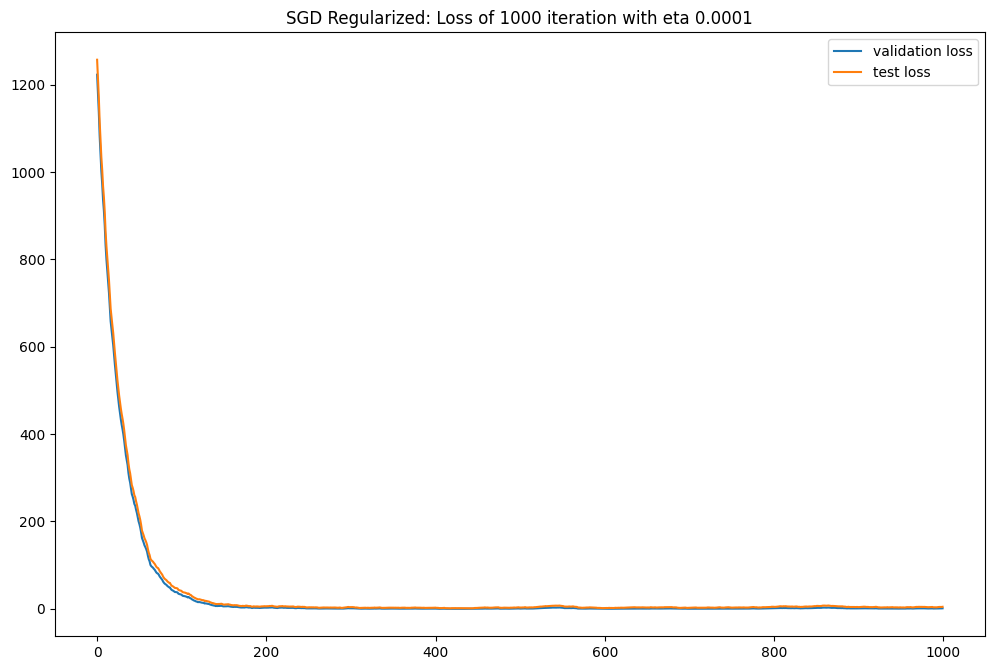

In [322]:
plotting(l1_validation_loss, l1_test_loss, "SGD Regularized")

In [323]:
np.subtract(l1_validation_loss, l1_test_loss)

array([-34.21530531, -33.88245045, -33.45095663, -32.8301452 ,
       -32.36016366, -31.94591628, -31.65920493, -31.22573159,
       -30.89885934, -30.62206023, -30.3925975 , -30.14126618,
       -29.86844191, -29.52417366, -29.32076508, -28.84902535,
       -28.55231895, -28.26900716, -27.98889372, -27.73368072,
       -27.3958235 , -27.04924447, -26.77445524, -26.4584945 ,
       -26.02873259, -25.76152385, -25.43842256, -25.18333068,
       -24.93585866, -24.63579819, -24.42037607, -24.18090983,
       -23.83765609, -23.52737917, -23.18650325, -22.88496535,
       -22.60761926, -22.035976  , -21.70598221, -21.44207929,
       -21.08809135, -20.66860117, -20.47406168, -20.25244319,
       -19.97485583, -19.84418821, -19.45851366, -19.19369744,
       -18.78253394, -18.3483993 , -18.1204185 , -17.80824065,
       -17.43138991, -16.93841136, -16.72122304, -16.48102644,
       -16.24708814, -16.08072728, -15.86969837, -15.60461009,
       -15.16529906, -14.78485616, -14.53639771, -14.13

## 3. $$||Y - XW||_1$$

In [324]:
def SGD_norm1(X_train, y_train, X_validation, y_validation, X_test, y_test, eta, batch_size, iterations):
    w = np.zeros(X_train.shape[1])
    train_loss, validation_loss, test_loss = list(), list(), list()
    
    for _ in range(iterations):
        indices = np.random.choice(X_train.shape[0], batch_size, replace=False)
        selected_X_train = X_train[indices]
        selected_y_train = y_train[indices]
        train_SSE = np.sum(np.abs(selected_y_train - selected_X_train.dot(w)))/2
        validation_SSE = np.sum(np.abs(y_validation - X_validation.dot(w)))/2
        test_SSE = np.sum(np.abs(y_test - X_test.dot(w)))/2
        train_loss.append(train_SSE)
        validation_loss.append(validation_SSE)
        test_loss.append(test_SSE)
        gradient = selected_X_train
        gradient[(selected_y_train - selected_X_train.dot(w)) < 0] = gradient[(selected_y_train - selected_X_train.dot(w)) < 0] * (-1)
        gradient = np.sum(gradient, axis=0)
        w += eta * gradient
    return train_loss, validation_loss, test_loss, w

In [325]:
n1_train_loss, n1_validation_loss, n1_test_loss, n1_w = SGD_norm1(X_train, y_train, X_validation, y_validation, X_test, y_test, eta, batch_size, iterations_no)

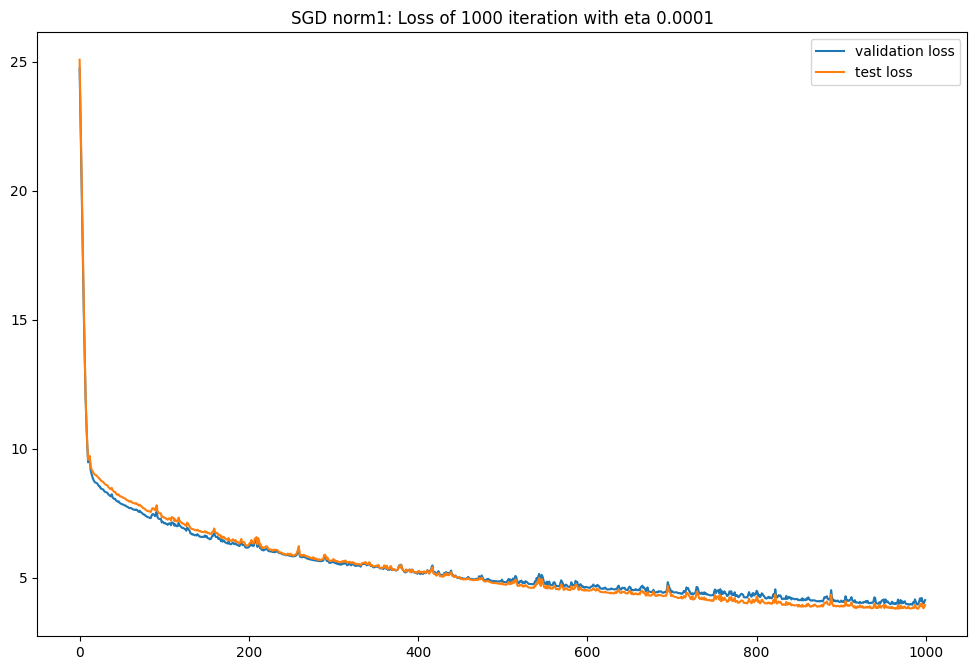

In [326]:
plotting(n1_validation_loss, n1_test_loss, "SGD norm1")

In [327]:
np.subtract(n1_validation_loss, n1_test_loss)

array([-0.34353464, -0.34802336, -0.34463878, -0.34027823, -0.33622438,
       -0.2725041 , -0.18583885, -0.08149692,  0.0012765 , -0.04175351,
       -0.10047354, -0.09926215, -0.08343784, -0.14810047, -0.18405115,
       -0.22174187, -0.26331219, -0.27884311, -0.29505091, -0.29455835,
       -0.28572624, -0.2770827 , -0.29679852, -0.30343287, -0.29102208,
       -0.3066493 , -0.30625192, -0.29667949, -0.28853069, -0.29973374,
       -0.29774605, -0.28483024, -0.28651641, -0.28001098, -0.28203651,
       -0.27871707, -0.27687938, -0.27617211, -0.2472577 , -0.27883999,
       -0.27713263, -0.2722986 , -0.27226727, -0.2657441 , -0.25854741,
       -0.26252275, -0.27080545, -0.26141885, -0.26742226, -0.28622623,
       -0.27506471, -0.27510864, -0.26905404, -0.27121304, -0.26785407,
       -0.25676025, -0.24890194, -0.25621129, -0.25121804, -0.25201397,
       -0.26419888, -0.26037231, -0.24844556, -0.250294  , -0.25056714,
       -0.24254206, -0.24112857, -0.24207318, -0.2435763 , -0.24

## 4. 

## Investigating Weights

##  $W_{SGD}$

In [328]:
w

array([-0.06885316,  0.00089091,  0.15616667, -0.06364301,  0.03283496,
       -0.0025    ,  0.031     ,  0.00427005,  0.0371    ,  0.        ,
        0.055     ,  0.04340455,  0.04234244,  0.0169    ,  0.0136    ,
        0.03048182,  0.0006    ,  0.022     , -0.0053    ,  0.0142    ,
        0.0785    ,  0.0384    ,  0.0257    ,  0.0073    ,  0.0109    ,
        0.0375    ,  0.0045    , -0.0049    ,  0.0194    , -0.0147    ,
        0.001     ,  0.0041    ,  0.0004    , -0.0116    ,  0.0004    ,
        0.0327    ,  0.0405    , -0.0015    ,  0.017     ,  0.0111    ,
        0.0062    ,  0.0182    ,  0.0082    ,  0.0073    ,  0.0042    ,
        0.001     ,  0.0019    ])

## $W_{L1}$

In [329]:
l1_w

array([-0.01348661,  0.00678155,  0.03984524, -0.00791772,  0.01285652,
        0.01361905,  0.0041631 ,  0.00115845,  0.02304438,  0.        ,
        0.0164512 ,  0.01127398,  0.0112517 ,  0.01483391,  0.01590551,
        0.00508647,  0.02341197,  0.01981326,  0.0154036 ,  0.02459218,
        0.02324493,  0.03896135,  0.02785209,  0.02069298,  0.02083878,
        0.02051006,  0.00372839,  0.00472405,  0.01369329,  0.00764332,
        0.00493869,  0.00384204,  0.00062678, -0.00852975, -0.00045417,
        0.00789593,  0.01633054, -0.00011526,  0.00292458,  0.00498635,
       -0.00167108,  0.0146185 ,  0.00018613,  0.00374679,  0.00019081,
       -0.00122178,  0.00012727])

## $W_{N1}$

In [330]:
n1_w

array([-0.06884177,  0.00335455,  0.1549    , -0.06389054,  0.03552602,
       -0.0005    ,  0.0302    ,  0.00430769,  0.0368    ,  0.        ,
        0.05153333,  0.04421553,  0.04152   ,  0.0147    ,  0.014     ,
        0.02846364, -0.0014    ,  0.0225    , -0.0059    ,  0.0144    ,
        0.0797    ,  0.0348    ,  0.026     ,  0.0083    ,  0.0071    ,
        0.0377    ,  0.0056    , -0.0051    ,  0.0224    , -0.0113    ,
        0.0046    ,  0.0046    ,  0.0009    , -0.0109    ,  0.0012    ,
        0.0309    ,  0.0407    , -0.0021    ,  0.0157    ,  0.0131    ,
        0.0053    ,  0.0169    ,  0.0117    ,  0.0083    ,  0.0026    ,
       -0.0005    ,  0.0018    ])

## Adjust $\lambda = 0$

Setting $\lambda = 0$ makes the ridge regression same as Sum Squared Error (SSE).

In [333]:
new_l1_train_loss, new_l1_validation_loss, new_l1_test_loss, new_l1_w = SGD_Regularized(0, X_train, y_train, X_validation, y_validation, X_test, y_test, eta, batch_size, iterations_no)

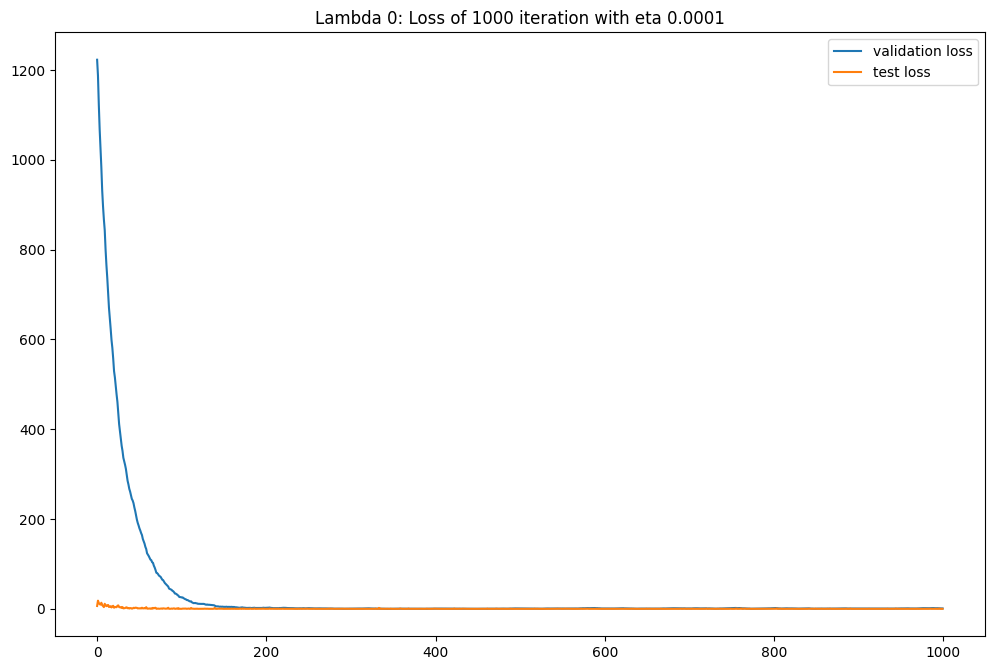

In [334]:
plotting(new_l1_validation_loss, new_l1_train_loss, "Lambda 0")

## Ridge Regression Benefits:

\begin{itemize}
    \item By adding penalty reduces overfitting. 
    \item It is guaranteed that we find 